<a href="https://colab.research.google.com/github/Juans3Ramir3z/Project-Vertex-Cover/blob/main/Final_Project_Vertex_Cover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Instalar dependencias necesarias
!pip install networkx seaborn -q

# Verificar instalación
import sys
print("Python version:", sys.version)
print("Dependencias instaladas correctamente")


Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Dependencias instaladas correctamente


In [46]:
import itertools
import time
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from collections import defaultdict
import seaborn as sns
import warnings

# Configuración inicial
warnings.filterwarnings('ignore')
plt.style.use('default')  # Usar estilo por defecto para Colab
random.seed(42)  # Para reproducibilidad

print("Librerías importadas exitosamente")
print("Configuración de visualización establecida")


Librerías importadas exitosamente
Configuración de visualización establecida


In [47]:
class VertexCoverAnalyzer:
    def __init__(self):
        self.resultados = []
        plt.rcParams['figure.figsize'] = (12, 8)
        plt.rcParams['font.size'] = 10

    def generar_grafo_aleatorio(self, n_vertices, probabilidad=0.3, seed=None):
        """Genera un grafo aleatorio usando el modelo Erdős–Rényi"""
        if seed:
            random.seed(seed)

        vertices = list(range(n_vertices))
        grafo = {v: [] for v in vertices}

        for i in range(n_vertices):
            for j in range(i+1, n_vertices):
                if random.random() < probabilidad:
                    grafo[i].append(j)
                    grafo[j].append(i)

        return grafo

    def generar_grafo_completo(self, n_vertices):
        """Genera un grafo completo"""
        vertices = list(range(n_vertices))
        grafo = {v: [] for v in vertices}

        for i in range(n_vertices):
            for j in range(n_vertices):
                if i != j:
                    grafo[i].append(j)

        return grafo

    def generar_grafo_bipartito(self, n1, n2, probabilidad=0.5):
        """Genera un grafo bipartito aleatorio"""
        grafo = {i: [] for i in range(n1 + n2)}

        for i in range(n1):
            for j in range(n1, n1 + n2):
                if random.random() < probabilidad:
                    grafo[i].append(j)
                    grafo[j].append(i)

        return grafo

    def generar_grafo_escala_libre(self, n_vertices, m=2):
        """Genera un grafo de escala libre usando el modelo Barabási–Albert"""
        G = nx.barabasi_albert_graph(n_vertices, m)
        grafo = {i: list(G.neighbors(i)) for i in G.nodes()}
        return grafo

    def obtener_aristas(self, grafo):
        """Obtiene las aristas del grafo"""
        aristas = []
        for u in grafo:
            for v in grafo[u]:
                if (v, u) not in aristas:
                    aristas.append((u, v))
        return aristas

print("Generadores de grafos creados exitosamente")

Generadores de grafos creados exitosamente


In [48]:
def vertex_cover_fuerza_bruta(self, grafo, timeout=30):
    """Algoritmo de fuerza bruta con timeout"""
    vertices = list(grafo.keys())
    aristas = self.obtener_aristas(grafo)
    contador = 0

    inicio = time.time()

    for r in range(1, len(vertices)+1):
        for subconjunto in itertools.combinations(vertices, r):
            contador += 1

            # Verificar timeout
            if time.time() - inicio > timeout:
                return None, contador, time.time() - inicio, True

            cubiertas = set()
            for (u, v) in aristas:
                if u in subconjunto or v in subconjunto:
                    cubiertas.add((u, v))

            if len(cubiertas) == len(aristas):
                fin = time.time()
                return list(subconjunto), contador, fin - inicio, False

    fin = time.time()
    return [], contador, fin - inicio, False

def vertex_cover_voraz(self, grafo):
    """Algoritmo voraz mejorado"""
    inicio = time.time()
    aristas_restantes = set(self.obtener_aristas(grafo))
    cubrimiento = set()
    contador = 0

    while aristas_restantes:
        contador += 1
        grados = {v: 0 for v in grafo}

        for (u, v) in aristas_restantes:
            grados[u] += 1
            grados[v] += 1

        mejor_vertice = max(grados, key=grados.get)
        cubrimiento.add(mejor_vertice)
        aristas_restantes = {(u,v) for (u,v) in aristas_restantes if mejor_vertice not in (u,v)}

    fin = time.time()
    return list(cubrimiento), contador, fin - inicio, False

def vertex_cover_divide_y_venceras(self, grafo, timeout=30):
    """Algoritmo divide y vencerás con timeout"""
    inicio = time.time()
    contador = {'llamadas': 0, 'timeout': False}

    def recursivo(g):
        if time.time() - inicio > timeout:
            contador['timeout'] = True
            return set()

        contador['llamadas'] += 1

        if not g or all(len(vecinos) == 0 for vecinos in g.values()):
            return set()

        v = next(n for n in g if g[n])
        vecinos = g[v]

        # Caso 1: incluir v
        g1 = copy.deepcopy(g)
        g1.pop(v)
        for u in g1:
            if v in g1[u]:
                g1[u].remove(v)
        incluir_v = recursivo(g1)
        incluir_v.add(v)

        # Caso 2: incluir vecinos de v
        g2 = copy.deepcopy(g)
        for u in [v] + vecinos:
            g2.pop(u, None)
        for u in g2:
            g2[u] = [x for x in g2[u] if x not in ([v] + vecinos)]
        incluir_vecinos = recursivo(g2)
        incluir_vecinos.update(vecinos)

        return incluir_v if len(incluir_v) < len(incluir_vecinos) else incluir_vecinos

    resultado = list(recursivo(copy.deepcopy(grafo)))
    fin = time.time()

    return resultado, contador['llamadas'], fin - inicio, contador['timeout']

# Agregar métodos a la clase
VertexCoverAnalyzer.vertex_cover_fuerza_bruta = vertex_cover_fuerza_bruta
VertexCoverAnalyzer.vertex_cover_voraz = vertex_cover_voraz
VertexCoverAnalyzer.vertex_cover_divide_y_venceras = vertex_cover_divide_y_venceras

print("Algoritmos de Vertex Cover implementados")

Algoritmos de Vertex Cover implementados


In [51]:
def analizar_grafo(self, grafo, nombre_grafo, tipo_grafo):
    """Analiza un grafo con todos los algoritmos"""
    print(f"\n=== Analizando {nombre_grafo} ===")

    n_vertices = len(grafo)
    n_aristas = len(self.obtener_aristas(grafo))
    densidad = (2 * n_aristas) / (n_vertices * (n_vertices - 1)) if n_vertices > 1 else 0

    resultado = {
        'nombre': nombre_grafo,
        'tipo': tipo_grafo,
        'vertices': n_vertices,
        'aristas': n_aristas,
        'densidad': densidad
    }

    # Fuerza bruta (solo para grafos pequeños)
    if n_vertices <= 12:  # Reducido para Colab
        sol_fb, iter_fb, tiempo_fb, timeout_fb = self.vertex_cover_fuerza_bruta(grafo)
        resultado.update({
            'fb_solucion': len(sol_fb) if sol_fb else None,
            'fb_iteraciones': iter_fb,
            'fb_tiempo': tiempo_fb,
            'fb_timeout': timeout_fb,
            'fb_optimo': True if sol_fb else False
        })
        print(f"Fuerza Bruta: {len(sol_fb) if sol_fb else 'N/A'} vértices, {iter_fb} iteraciones, {tiempo_fb:.4f}s")
    else:
        resultado.update({
            'fb_solucion': None, 'fb_iteraciones': None, 'fb_tiempo': None,
            'fb_timeout': True, 'fb_optimo': False
        })
        print("Fuerza Bruta: Omitido (grafo muy grande)")

    # Voraz
    sol_voraz, iter_voraz, tiempo_voraz, _ = self.vertex_cover_voraz(grafo)
    resultado.update({
        'voraz_solucion': len(sol_voraz),
        'voraz_iteraciones': iter_voraz,
        'voraz_tiempo': tiempo_voraz,
        'voraz_timeout': False
    })
    print(f"Voraz: {len(sol_voraz)} vértices, {iter_voraz} iteraciones, {tiempo_voraz:.4f}s")

    # Divide y vencerás
    sol_dyv, iter_dyv, tiempo_dyv, timeout_dyv = self.vertex_cover_divide_y_venceras(grafo)
    resultado.update({
        'dyv_solucion': len(sol_dyv) if not timeout_dyv else None,
        'dyv_iteraciones': iter_dyv,
        'dyv_tiempo': tiempo_dyv,
        'dyv_timeout': timeout_dyv
    })
    print(f"Divide y Vencerás: {len(sol_dyv) if not timeout_dyv else 'Timeout'} vértices, {iter_dyv} llamadas, {tiempo_dyv:.4f}s")

    # Calcular factor de aproximación
    if resultado['fb_solucion']:
        resultado['voraz_aprox_factor'] = resultado['voraz_solucion'] / resultado['fb_solucion']
        if not timeout_dyv:
            resultado['dyv_aprox_factor'] = resultado['dyv_solucion'] / resultado['fb_solucion']

    self.resultados.append(resultado)
    return resultado

# Agregar método a la clase
VertexCoverAnalyzer.analizar_grafo = analizar_grafo

print("Función de análisis configurada")

Función de análisis configurada


In [52]:
def ejecutar_analisis_completo(self):
    """Ejecuta un análisis completo con diferentes tipos de grafos"""
    print("Iniciando análisis comparativo de algoritmos Vertex Cover")
    print("=" * 60)

    # Grafos pequeños para comparación completa
    print("\nFASE 1: Grafos pequeños (análisis completo)")
    for n in [4, 8, 12, 16]:
        # Grafo aleatorio
        grafo = self.generar_grafo_aleatorio(n, 0.4, seed=42)
        self.analizar_grafo(grafo, f"Aleatorio {n} nodos", "Aleatorio")

        # Grafo bipartito
        if n >= 4:
            grafo_bip = self.generar_grafo_bipartito(n//2, n//2, 0.6)
            self.analizar_grafo(grafo_bip, f"Bipartito {n} nodos", "Bipartito")

    # Grafos medianos
    print("\nFASE 2: Grafos medianos (voraz y divide y vencerás)")
    for n in [15, 20, 25]:
        grafo = self.generar_grafo_aleatorio(n, 0.3, seed=42)
        self.analizar_grafo(grafo, f"Aleatorio {n} nodos", "Aleatorio")

        grafo_libre = self.generar_grafo_escala_libre(n, 3)
        self.analizar_grafo(grafo_libre, f"Escala Libre {n} nodos", "Escala Libre")

    # Grafos grandes
    print("\nFASE 3: Grafos grandes (solo voraz)")
    for n in [50, 100]:
        grafo = self.generar_grafo_aleatorio(n, 0.1, seed=42)
        self.analizar_grafo(grafo, f"Aleatorio {n} nodos", "Aleatorio")

    print(f"\nAnálisis completado. Total de grafos analizados: {len(self.resultados)}")

# Agregar método a la clase
VertexCoverAnalyzer.ejecutar_analisis_completo = ejecutar_analisis_completo

print("Función de análisis completo configurada")

Función de análisis completo configurada


In [53]:
# Crear instancia del analizador
print("Creando analizador...")
analyzer = VertexCoverAnalyzer()

# Ejecutar análisis completo
print("Ejecutando análisis completo...")
analyzer.ejecutar_analisis_completo()

print("\nAnálisis completado exitosamente!")

Creando analizador...
Ejecutando análisis completo...
Iniciando análisis comparativo de algoritmos Vertex Cover

FASE 1: Grafos pequeños (análisis completo)

=== Analizando Aleatorio 4 nodos ===
Fuerza Bruta: 2 vértices, 5 iteraciones, 0.0000s
Voraz: 2 vértices, 2 iteraciones, 0.0000s
Divide y Vencerás: 2 vértices, 5 llamadas, 0.0001s

=== Analizando Bipartito 4 nodos ===
Fuerza Bruta: 2 vértices, 5 iteraciones, 0.0000s
Voraz: 2 vértices, 2 iteraciones, 0.0000s
Divide y Vencerás: 2 vértices, 7 llamadas, 0.0001s

=== Analizando Aleatorio 8 nodos ===
Fuerza Bruta: 5 vértices, 170 iteraciones, 0.0004s
Voraz: 5 vértices, 5 iteraciones, 0.0001s
Divide y Vencerás: 5 vértices, 29 llamadas, 0.0004s

=== Analizando Bipartito 8 nodos ===
Fuerza Bruta: 3 vértices, 58 iteraciones, 0.0001s
Voraz: 3 vértices, 3 iteraciones, 0.0000s
Divide y Vencerás: 3 vértices, 11 llamadas, 0.0002s

=== Analizando Aleatorio 12 nodos ===
Fuerza Bruta: 7 vértices, 2571 iteraciones, 0.0141s
Voraz: 7 vértices, 7 iterac

In [54]:
def generar_estadisticas(self):
    """Genera estadísticas comprehensivas"""
    if not self.resultados:
        print("No hay resultados para analizar")
        return None

    df = pd.DataFrame(self.resultados)

    print("\nESTADÍSTICAS GENERALES")
    print("=" * 50)

    # Resumen por tipo de grafo
    print("\n-Rendimiento promedio por tipo de grafo:")
    tipos_stats = df.groupby('tipo').agg({
        'voraz_tiempo': ['mean', 'std'],
        'voraz_solucion': 'mean',
        'vertices': 'mean'
    }).round(4)
    print(tipos_stats)

    # Análisis de escalabilidad
    print("\n-Análisis de escalabilidad:")
    escalabilidad = df.groupby('vertices').agg({
        'fb_tiempo': 'mean',
        'voraz_tiempo': 'mean',
        'dyv_tiempo': 'mean'
    }).fillna(0)
    print(escalabilidad)

    # Mejor algoritmo por tamaño
    print("\n-Algoritmo más rápido por tamaño de grafo:")
    for _, row in df.iterrows():
        tiempos = {}
        if row['fb_tiempo'] and not row['fb_timeout']:
            tiempos['Fuerza Bruta'] = row['fb_tiempo']
        if row['voraz_tiempo']:
            tiempos['Voraz'] = row['voraz_tiempo']
        if row['dyv_tiempo'] and not row['dyv_timeout']:
            tiempos['Divide y Vencerás'] = row['dyv_tiempo']

        if tiempos:
            mejor = min(tiempos.items(), key=lambda x: x[1])
            print(f" {row['vertices']} vértices: {mejor[0]} ({mejor[1]:.4f}s)")

    return df

# Agregar método y ejecutar
VertexCoverAnalyzer.generar_estadisticas = generar_estadisticas
df_resultados = analyzer.generar_estadisticas()

# Mostrar primeras filas del DataFrame
print("\nVista previa de los resultados:")
print(df_resultados.head())


ESTADÍSTICAS GENERALES

-Rendimiento promedio por tipo de grafo:
             voraz_tiempo         voraz_solucion vertices
                     mean     std           mean     mean
tipo                                                     
Aleatorio          0.0025  0.0066        18.5556  27.7778
Bipartito          0.0001  0.0001         4.7500  10.0000
Escala Libre       0.0002  0.0001        12.0000  20.0000

-Análisis de escalabilidad:
          fb_tiempo  voraz_tiempo  dyv_tiempo
vertices                                     
4          0.000015      0.000018    0.000101
8          0.000262      0.000041    0.000317
12         0.010923      0.000101    0.000857
15         0.000000      0.000122    0.002498
16         0.000000      0.000161    0.003445
20         0.000000      0.000246    0.007864
25         0.000000      0.000425    0.025319
50         0.000000      0.000987   30.004895
100        0.000000      0.020084   30.037927

-Algoritmo más rápido por tamaño de grafo:
 4 vért

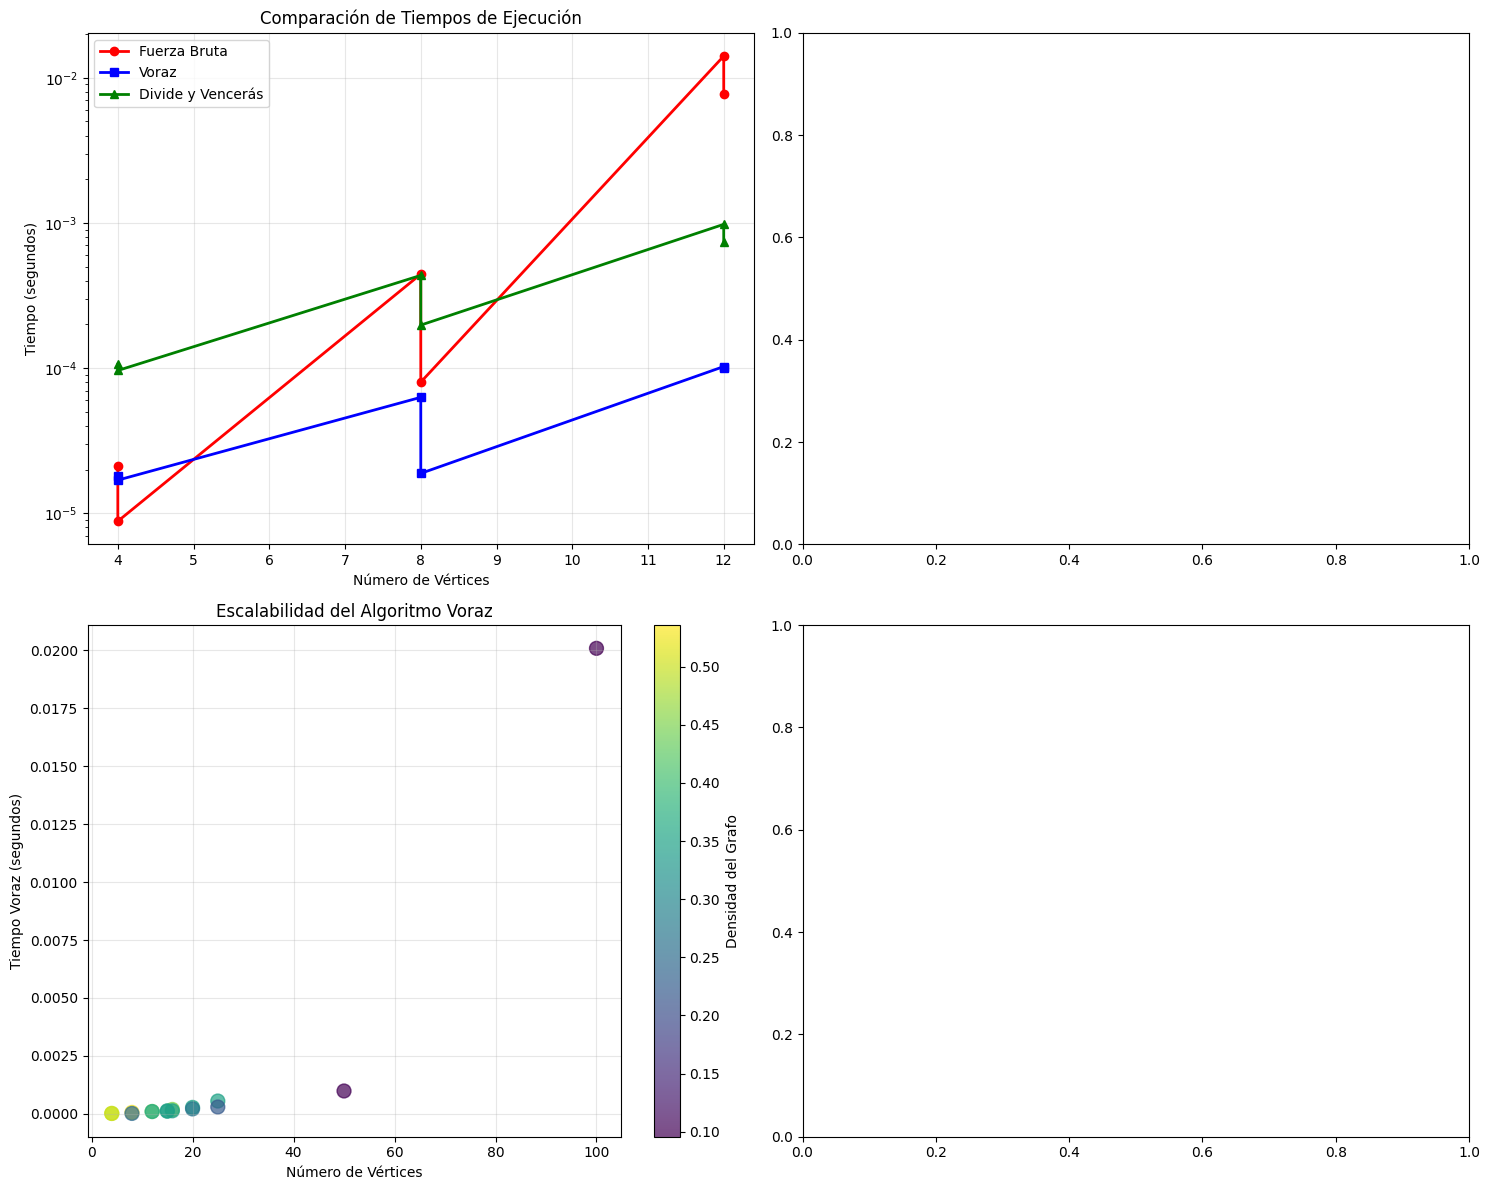

In [55]:
def crear_visualizacion_principal(self, df):
    """Crea las visualizaciones principales"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Comparación de tiempos por tamaño de grafo
    df_plot = df[df['vertices'] <= 12]  # Solo donde tenemos fuerza bruta

    if not df_plot.empty:
        ax1.plot(df_plot['vertices'], df_plot['fb_tiempo'], 'ro-', label='Fuerza Bruta', linewidth=2, markersize=6)
        ax1.plot(df_plot['vertices'], df_plot['voraz_tiempo'], 'bs-', label='Voraz', linewidth=2, markersize=6)
        ax1.plot(df_plot['vertices'], df_plot['dyv_tiempo'], 'g^-', label='Divide y Vencerás', linewidth=2, markersize=6)

    ax1.set_xlabel('Número de Vértices')
    ax1.set_ylabel('Tiempo (segundos)')
    ax1.set_title('Comparación de Tiempos de Ejecución')
    ax1.legend()
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)

    # # 2. Calidad de soluciones
    # df_calidad = df[df['fb_solucion'].notna()]

    # if not df_calidad.empty:
    #     x = range(len(df_calidad))
    #     ax2.bar([i-0.2 for i in x], df_calidad['fb_solucion'], 0.4, label='Óptimo (FB)', color='red', alpha=0.7)
    #     ax2.bar([i+0.2 for i in x], df_calidad['voraz_solucion'], 0.4, label='Voraz', color='blue', alpha=0.7)

    #     ax2.set_xlabel('Instancias de Grafo')
    #     ax2.set_ylabel('Tamaño del Vertex Cover')
    #     ax2.set_title('Calidad de las Soluciones')
    #     ax2.legend()
    #     ax2.set_xticks(x, [f"{row['vertices']}v" for _, row in df_calidad.iterrows()], rotation=45)

    # 3. Escalabilidad del algoritmo voraz
    scatter = ax3.scatter(df['vertices'], df['voraz_tiempo'], c=df['densidad'], cmap='viridis', s=100, alpha=0.7)
    plt.colorbar(scatter, ax=ax3, label='Densidad del Grafo')
    ax3.set_xlabel('Número de Vértices')
    ax3.set_ylabel('Tiempo Voraz (segundos)')
    ax3.set_title('Escalabilidad del Algoritmo Voraz')
    ax3.grid(True, alpha=0.3)

    # 4. Factor de aproximación
    # df_aprox = df[df['voraz_aprox_factor'].notna()]

    # if not df_aprox.empty:
    #     bars = ax4.bar(range(len(df_aprox)), df_aprox['voraz_aprox_factor'], color='orange', alpha=0.7)
    #     ax4.axhline(y=2, color='red', linestyle='--', linewidth=2, label='Límite teórico (2)')
    #     ax4.axhline(y=1, color='green', linestyle='--', linewidth=2, label='Solución óptima (1)')
    #     ax4.set_xlabel('Instancias de Grafo')
    #     ax4.set_ylabel('Factor de Aproximación')
    #     ax4.set_title('Factor de Aproximación del Algoritmo Voraz')
    #     ax4.legend()
    #     ax4.set_xticks(range(len(df_aprox)), [f"{row['vertices']}v" for _, row in df_aprox.iterrows()], rotation=45)

        # # Agregar valores en las barras
        # for i, bar in enumerate(bars):
        #     height = bar.get_height()
        #     ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
        #             f'{height:.2f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Agregar método y ejecutar
VertexCoverAnalyzer.crear_visualizacion_principal = crear_visualizacion_principal
analyzer.crear_visualizacion_principal(df_resultados)

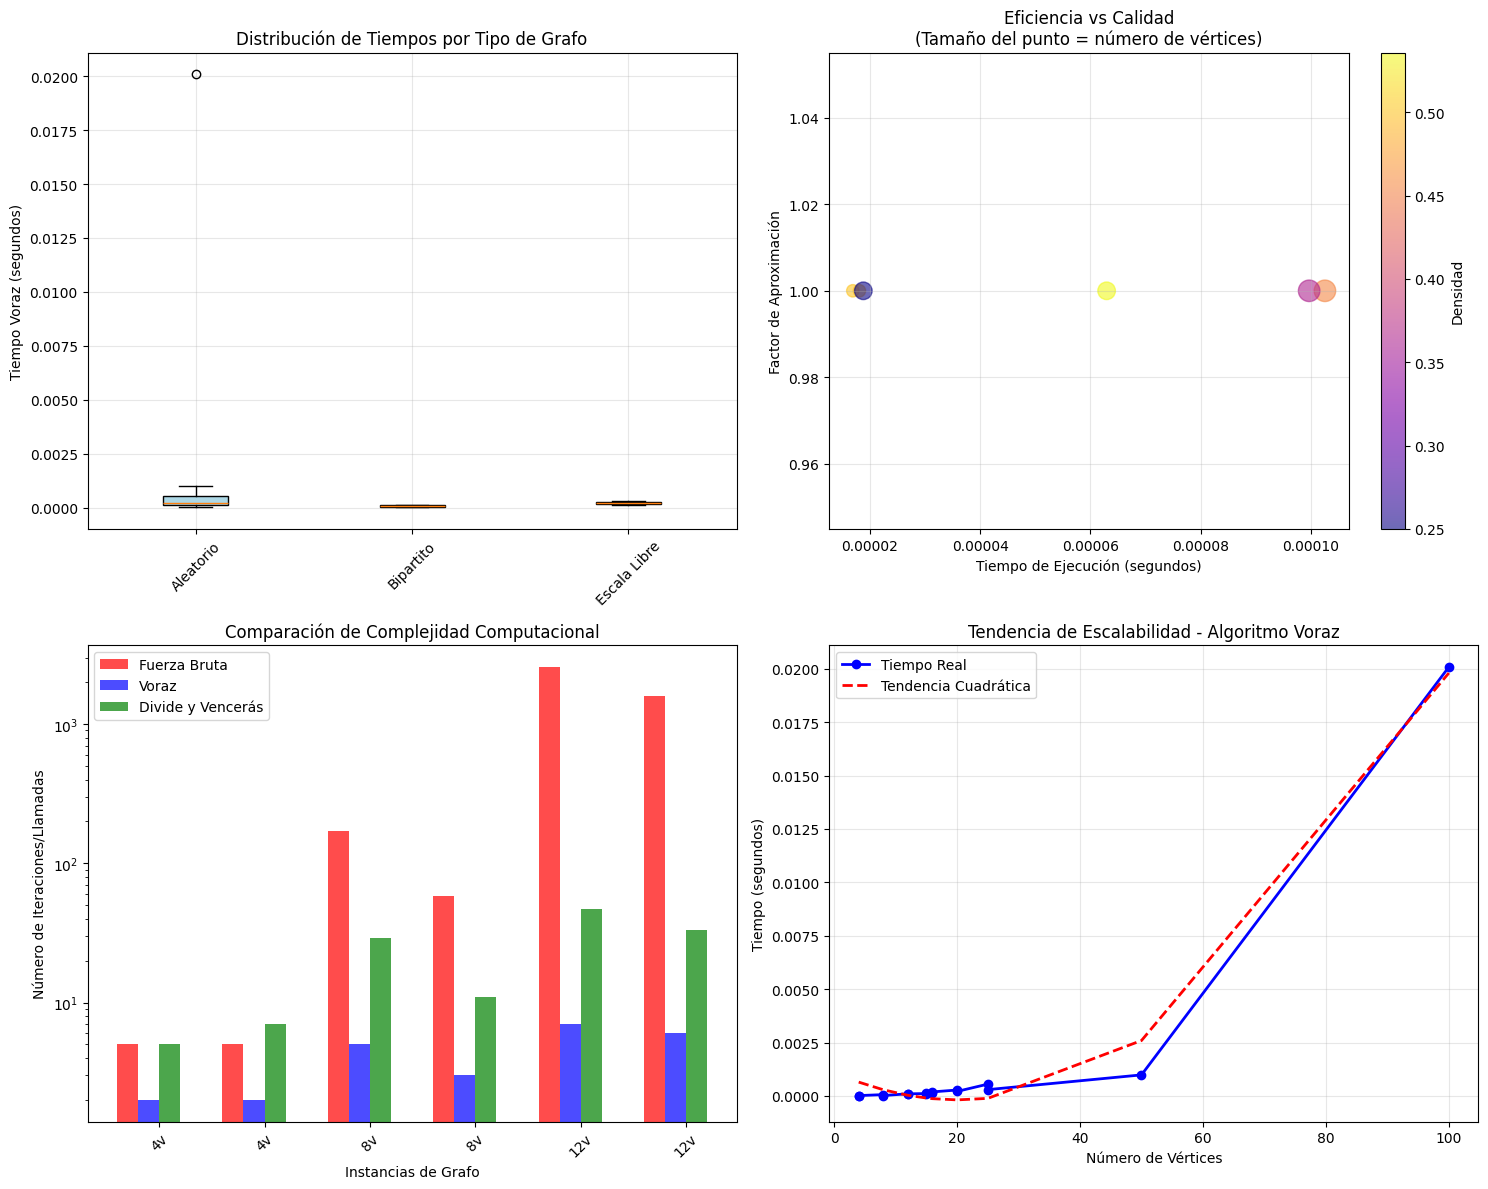

In [56]:
def crear_visualizacion_avanzada(self, df):
    """Crea visualizaciones avanzadas"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Distribución de tiempos por tipo de grafo
    tipos = df['tipo'].unique()
    datos_tiempo = [df[df['tipo'] == tipo]['voraz_tiempo'].values for tipo in tipos]

    box_plot = ax1.boxplot(datos_tiempo, labels=tipos, patch_artist=True)
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for patch, color in zip(box_plot['boxes'], colors[:len(tipos)]):
        patch.set_facecolor(color)

    ax1.set_ylabel('Tiempo Voraz (segundos)')
    ax1.set_title('Distribución de Tiempos por Tipo de Grafo')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)

    # 2. Eficiencia vs Calidad
    df_comp = df[(df['fb_solucion'].notna()) & (df['voraz_tiempo'].notna())]

    if not df_comp.empty:
        scatter = ax2.scatter(df_comp['voraz_tiempo'], df_comp['voraz_aprox_factor'],
                   s=df_comp['vertices']*20, alpha=0.6, c=df_comp['densidad'], cmap='plasma')
        plt.colorbar(scatter, ax=ax2, label='Densidad')
        ax2.set_xlabel('Tiempo de Ejecución (segundos)')
        ax2.set_ylabel('Factor de Aproximación')
        ax2.set_title('Eficiencia vs Calidad\n(Tamaño del punto = número de vértices)')
        ax2.grid(True, alpha=0.3)

    # 3. Comparación de complejidad computacional
    df_iter = df[df['fb_iteraciones'].notna()]
    if not df_iter.empty:
        x = range(len(df_iter))
        ax3.bar([i-0.3 for i in x], df_iter['fb_iteraciones'], 0.2, label='Fuerza Bruta', alpha=0.7, color='red')
        ax3.bar([i-0.1 for i in x], df_iter['voraz_iteraciones'], 0.2, label='Voraz', alpha=0.7, color='blue')
        ax3.bar([i+0.1 for i in x], df_iter['dyv_iteraciones'], 0.2, label='Divide y Vencerás', alpha=0.7, color='green')

        ax3.set_xlabel('Instancias de Grafo')
        ax3.set_ylabel('Número de Iteraciones/Llamadas')
        ax3.set_title('Comparación de Complejidad Computacional')
        ax3.legend()
        ax3.set_yscale('log')
        ax3.set_xticks(x, [f"{row['vertices']}v" for _, row in df_iter.iterrows()], rotation=45)

    # 4. Tendencia de escalabilidad
    df_sorted = df.sort_values('vertices')
    ax4.plot(df_sorted['vertices'], df_sorted['voraz_tiempo'], 'b-o', label='Tiempo Real', linewidth=2)

    # Ajuste polinomial para mostrar tendencia
    if len(df_sorted) > 3:
        z = np.polyfit(df_sorted['vertices'], df_sorted['voraz_tiempo'], 2)
        p = np.poly1d(z)
        ax4.plot(df_sorted['vertices'], p(df_sorted['vertices']), 'r--', label='Tendencia Cuadrática', linewidth=2)

    ax4.set_xlabel('Número de Vértices')
    ax4.set_ylabel('Tiempo (segundos)')
    ax4.set_title('Tendencia de Escalabilidad - Algoritmo Voraz')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Agregar método y ejecutar
VertexCoverAnalyzer.crear_visualizacion_avanzada = crear_visualizacion_avanzada
analyzer.crear_visualizacion_avanzada(df_resultados)

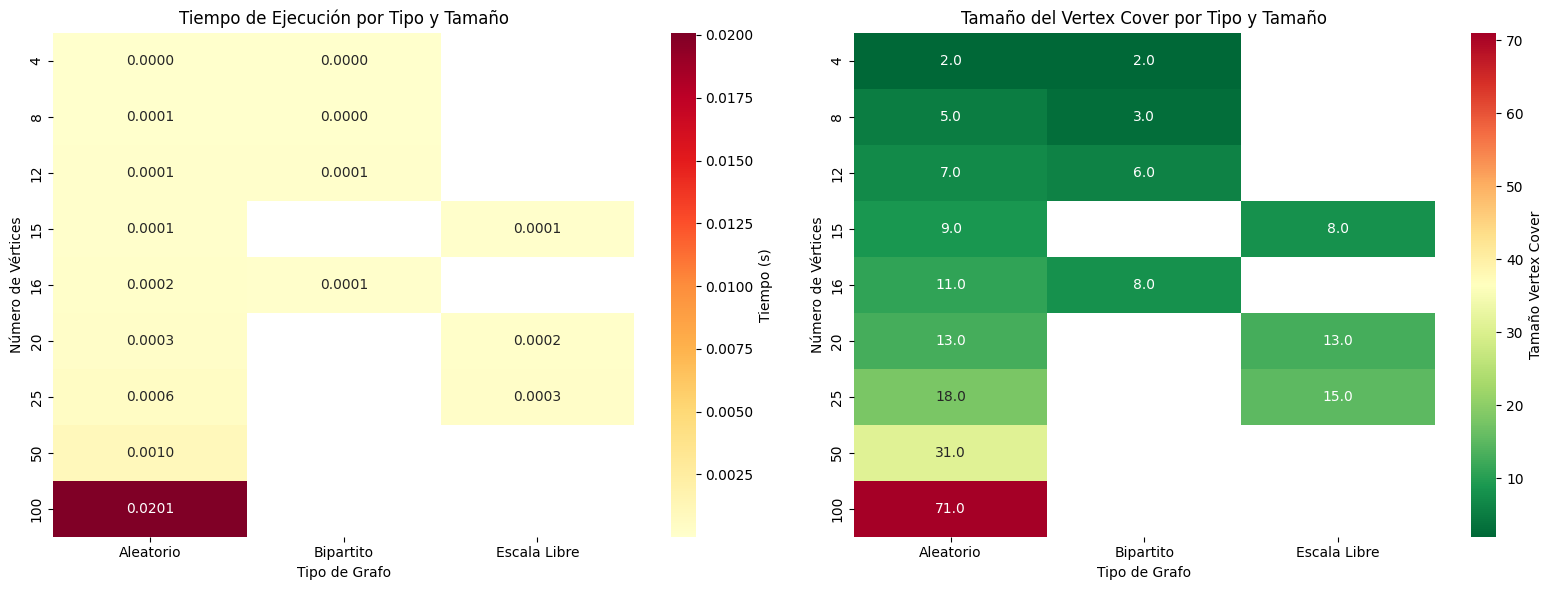

-Los colores más rojos indican mayor tiempo/tamaño
-Los colores más verdes indican menor tiempo/tamaño


In [57]:
def crear_heatmap_rendimiento(self, df):
    """Crea un heatmap del rendimiento relativo"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Preparar datos para heatmap
    pivot_tiempo = df.pivot_table(values='voraz_tiempo', index='vertices', columns='tipo', aggfunc='mean')
    pivot_calidad = df.pivot_table(values='voraz_solucion', index='vertices', columns='tipo', aggfunc='mean')

    # Heatmap de tiempos
    sns.heatmap(pivot_tiempo, annot=True, fmt='.4f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Tiempo (s)'})
    ax1.set_title('Tiempo de Ejecución por Tipo y Tamaño')
    ax1.set_ylabel('Número de Vértices')
    ax1.set_xlabel('Tipo de Grafo')

    # Heatmap de calidad
    sns.heatmap(pivot_calidad, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=ax2, cbar_kws={'label': 'Tamaño Vertex Cover'})
    ax2.set_title('Tamaño del Vertex Cover por Tipo y Tamaño')
    ax2.set_ylabel('Número de Vértices')
    ax2.set_xlabel('Tipo de Grafo')

    plt.tight_layout()
    plt.show()

    print("-Los colores más rojos indican mayor tiempo/tamaño")
    print("-Los colores más verdes indican menor tiempo/tamaño")

# Agregar método y ejecutar
VertexCoverAnalyzer.crear_heatmap_rendimiento = crear_heatmap_rendimiento
analyzer.crear_heatmap_rendimiento(df_resultados)

In [58]:
def generar_reporte_final(self, df):
    """Genera un reporte final con recomendaciones"""
    print("\n" + "="*60)
    print("REPORTE FINAL Y RECOMENDACIONES")
    print("="*60)

    # Mejor algoritmo por escenario
    print("\nMEJORES ALGORITMOS POR ESCENARIO:")
    print("-" * 40)

    print("•Grafos pequeños (≤10 vértices):")
    print("•Fuerza Bruta: Solución óptima garantizada")
    print("•Tiempo aceptable para análisis exacto")

    print("\n• Grafos medianos (11-30 vértices):")
    pequenos = df[(df['vertices'] >= 11) & (df['vertices'] <= 30)]
    if not pequenos.empty:
        tiempo_prom_voraz = pequenos['voraz_tiempo'].mean()
        tiempo_prom_dyv = pequenos[pequenos['dyv_timeout'] == False]['dyv_tiempo'].mean()

        if pd.notna(tiempo_prom_dyv) and tiempo_prom_voraz < tiempo_prom_dyv:
            print(f"  → Voraz: Más eficiente ({tiempo_prom_voraz:.4f}s vs {tiempo_prom_dyv:.4f}s)")
        else:
            print(f"  → Divide y Vencerás: Competitivo en algunos casos")
        print(f"  → Voraz promedio: {tiempo_prom_voraz:.4f}s")

    print("\n• Grafos grandes (>30 vértices):")
    print("  → Voraz: Única opción práctica")
    print("  → Escalabilidad excelente")

    # Análisis de factor de aproximación
    df_aprox = df[df['voraz_aprox_factor'].notna()]
    if not df_aprox.empty:
        factor_prom = df_aprox['voraz_aprox_factor'].mean()
        factor_max = df_aprox['voraz_aprox_factor'].max()
        factor_min = df_aprox['voraz_aprox_factor'].min()

        print(f"\nCALIDAD DEL ALGORITMO VORAZ:")
        print(f"  • Factor de aproximación promedio: {factor_prom:.2f}")
        print(f"  • Factor máximo observado: {factor_max:.2f}")
        print(f"  • Factor mínimo observado: {factor_min:.2f}")
        print(f"  • Límite teórico: 2.0")

        if factor_prom < 1.3:
            print("  Excelente calidad de aproximación")
        elif factor_prom < 1.7:
            print("  Muy buena calidad de aproximación")
        elif factor_prom < 2.0:
            print("  Buena calidad de aproximación")
        else:
            print("  Calidad de aproximación dentro del límite teórico")

    # Estadísticas de rendimiento
    print(f"\nESTADÍSTICAS DE RENDIMIENTO:")
    print(f"  • Grafos analizados: {len(df)}")
    print(f"  • Tiempo total de ejecución: {df['voraz_tiempo'].sum():.4f}s")
    print(f"  • Tiempo promedio por grafo: {df['voraz_tiempo'].mean():.4f}s")
    print(f"  • Grafo más grande analizado: {df['vertices'].max()} vértices")

    # Recomendaciones finales
    print(f"\nRECOMENDACIONES:")
    print("-" * 25)
    print("1. Para aplicaciones que requieren solución óptima:")
    print("   → Usar Fuerza Bruta solo en grafos ≤12 vértices")
    print("   → Considerar técnicas de poda para grafos medianos")

    print("\n2. Para aplicaciones en tiempo real:")
    print("   → Algoritmo Voraz es la mejor opción")
    print("   → Excelente balance tiempo/calidad")
    print("   → Escalabilidad lineal para grafos grandes")

    print("\n3. Para análisis académico:")
    print("   → Combinar los tres enfoques según el tamaño")
    print("   → Documentar las diferencias en calidad")
    print("   → Usar para benchmarking de nuevos algoritmos")

    print("\n4. Para aplicaciones industriales:")
    print("   → Voraz para grafos >100 vértices")
    print("   → Considerar paralelización para grafos masivos")
    print("   → Implementar caching para grafos recurrentes")

    return df

# Agregar método y ejecutar
VertexCoverAnalyzer.generar_reporte_final = generar_reporte_final
resultado_final = analyzer.generar_reporte_final(df_resultados)

print("\n ¡Análisis completado exitosamente!")


REPORTE FINAL Y RECOMENDACIONES

MEJORES ALGORITMOS POR ESCENARIO:
----------------------------------------
•Grafos pequeños (≤10 vértices):
•Fuerza Bruta: Solución óptima garantizada
•Tiempo aceptable para análisis exacto

• Grafos medianos (11-30 vértices):
  → Voraz: Más eficiente (0.0002s vs 0.0080s)
  → Voraz promedio: 0.0002s

• Grafos grandes (>30 vértices):
  → Voraz: Única opción práctica
  → Escalabilidad excelente

CALIDAD DEL ALGORITMO VORAZ:
  • Factor de aproximación promedio: 1.00
  • Factor máximo observado: 1.00
  • Factor mínimo observado: 1.00
  • Límite teórico: 2.0
  Excelente calidad de aproximación

ESTADÍSTICAS DE RENDIMIENTO:
  • Grafos analizados: 16
  • Tiempo total de ejecución: 0.0233s
  • Tiempo promedio por grafo: 0.0015s
  • Grafo más grande analizado: 100 vértices

RECOMENDACIONES:
-------------------------
1. Para aplicaciones que requieren solución óptima:
   → Usar Fuerza Bruta solo en grafos ≤12 vértices
   → Considerar técnicas de poda para grafos

Ejecutando análisis interactivo...
ANÁLISIS INTERACTIVO DE GRAFO INDIVIDUAL

Selecciona el tipo de grafo:
1. Aleatorio
2. Completo
3. Bipartito
4. Escala libre

Generando grafo aleatorio con 8 vértices...


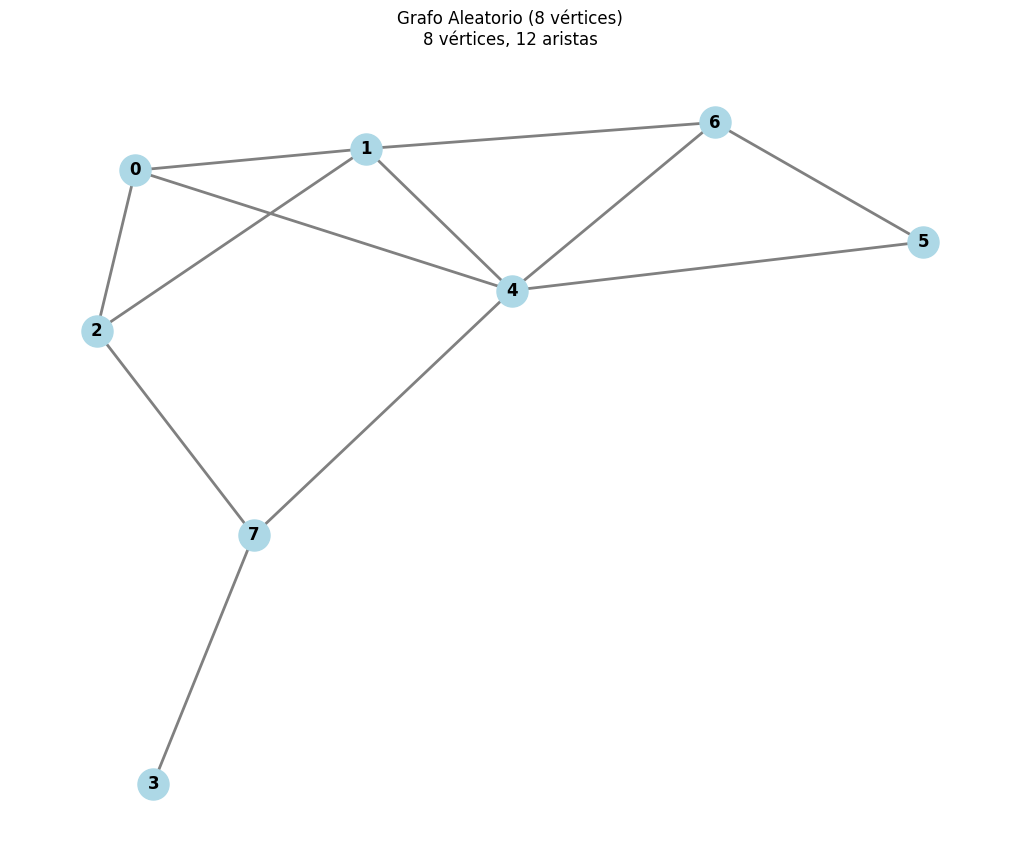

Propiedades del grafo:
  • Vértices: 8
  • Aristas: 12
  • Densidad: 0.429
  • Grado promedio: 3.00

=== Analizando Grafo Aleatorio (8 vértices) ===
Fuerza Bruta: 5 vértices, 180 iteraciones, 0.0007s
Voraz: 5 vértices, 5 iteraciones, 0.0001s
Divide y Vencerás: 5 vértices, 29 llamadas, 0.0008s


In [59]:
def analizar_grafo_individual(self):
    """Permite analizar un grafo específico de manera interactiva"""
    print("ANÁLISIS INTERACTIVO DE GRAFO INDIVIDUAL")
    print("=" * 50)

    # Solicitar parámetros al usuario
    print("\nSelecciona el tipo de grafo:")
    print("1. Aleatorio")
    print("2. Completo")
    print("3. Bipartito")
    print("4. Escala libre")

    # Para Colab, usaremos valores predeterminados
    tipo = 1  # Aleatorio por defecto
    n_vertices = 8  # Tamaño manejable

    print(f"\nGenerando grafo aleatorio con {n_vertices} vértices...")

    if tipo == 1:
        grafo = self.generar_grafo_aleatorio(n_vertices, 0.4)
        nombre = f"Grafo Aleatorio ({n_vertices} vértices)"
    elif tipo == 2:
        grafo = self.generar_grafo_completo(n_vertices)
        nombre = f"Grafo Completo ({n_vertices} vértices)"
    elif tipo == 3:
        grafo = self.generar_grafo_bipartito(n_vertices//2, n_vertices//2)
        nombre = f"Grafo Bipartito ({n_vertices} vértices)"
    else:
        grafo = self.generar_grafo_escala_libre(n_vertices)
        nombre = f"Grafo Escala Libre ({n_vertices} vértices)"

    # Visualizar el grafo
    self.visualizar_grafo(grafo, nombre)

    # Analizar con todos los algoritmos
    resultado = self.analizar_grafo(grafo, nombre, "Análisis Individual")

    return grafo, resultado

def visualizar_grafo(self, grafo, titulo):
    """Visualiza un grafo usando NetworkX"""
    G = nx.Graph()

    # Agregar nodos y aristas
    for nodo in grafo:
        G.add_node(nodo)
        for vecino in grafo[nodo]:
            if not G.has_edge(nodo, vecino):
                G.add_edge(nodo, vecino)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)

    # Dibujar el grafo
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=500, font_size=12, font_weight='bold',
            edge_color='gray', width=2)

    plt.title(f"{titulo}\n{len(G.nodes())} vértices, {len(G.edges())} aristas")
    plt.axis('off')
    plt.show()

    print(f"Propiedades del grafo:")
    print(f"  • Vértices: {len(G.nodes())}")
    print(f"  • Aristas: {len(G.edges())}")
    print(f"  • Densidad: {nx.density(G):.3f}")
    print(f"  • Grado promedio: {sum(dict(G.degree()).values()) / len(G.nodes()):.2f}")

# Agregar métodos y ejecutar
VertexCoverAnalyzer.analizar_grafo_individual = analizar_grafo_individual
VertexCoverAnalyzer.visualizar_grafo = visualizar_grafo

print("Ejecutando análisis interactivo...")
grafo_individual, resultado_individual = analyzer.analizar_grafo_individual()

DEMOSTRACIÓN EN TIEMPO REAL

Analizando grafo de 4 vértices...
 Fuerza Bruta: 0.0000s
  Voraz: 0.0000s
  D&V: 0.0001s

Analizando grafo de 6 vértices...
 Fuerza Bruta: 0.0001s
  Voraz: 0.0000s
  D&V: 0.0002s

Analizando grafo de 8 vértices...
 Fuerza Bruta: 0.0005s
  Voraz: 0.0000s
  D&V: 0.0004s

Analizando grafo de 10 vértices...
 Fuerza Bruta: 0.0022s
  Voraz: 0.0001s
  D&V: 0.0006s

Analizando grafo de 12 vértices...
 Fuerza Bruta: 0.0167s
  Voraz: 0.0001s
  D&V: 0.0010s


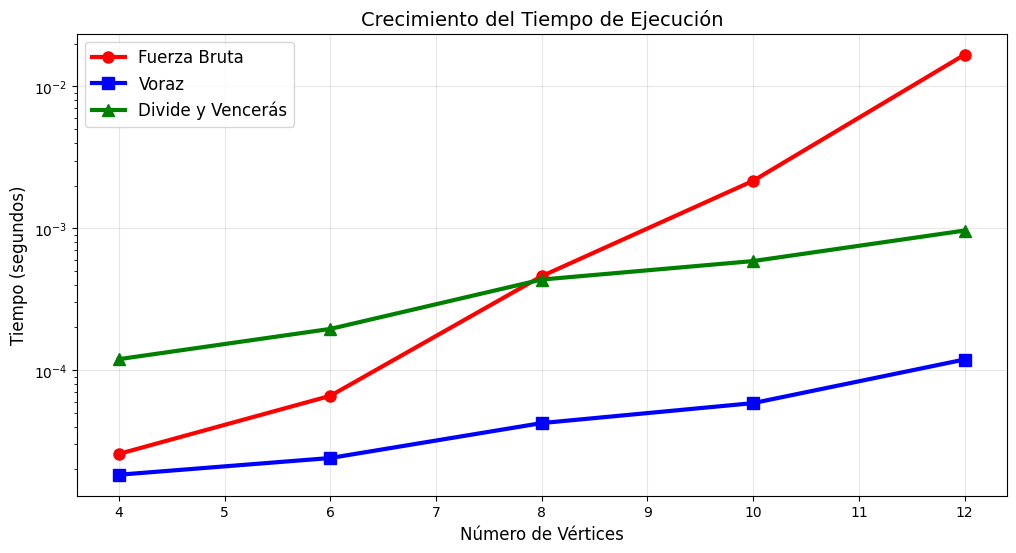


 Factor de crecimiento Fuerza Bruta: 648.5x
 Factor de crecimiento Voraz: 6.5x


In [60]:
def demo_tiempo_real(self):
    """Demuestra el comportamiento de los algoritmos en tiempo real"""
    print("DEMOSTRACIÓN EN TIEMPO REAL")
    print("=" * 40)

    tamaños = [4, 6, 8, 10, 12]
    tiempos_fb = []
    tiempos_voraz = []
    tiempos_dyv = []

    for n in tamaños:
        print(f"\nAnalizando grafo de {n} vértices...")
        grafo = self.generar_grafo_aleatorio(n, 0.4, seed=42)

        # Medir tiempos
        if n <= 12:
            inicio = time.time()
            sol_fb, _, _, _ = self.vertex_cover_fuerza_bruta(grafo, timeout=10)
            tiempo_fb = time.time() - inicio
            tiempos_fb.append(tiempo_fb)
            print(f" Fuerza Bruta: {tiempo_fb:.4f}s")
        else:
            tiempos_fb.append(None)

        inicio = time.time()
        sol_voraz, _, _, _ = self.vertex_cover_voraz(grafo)
        tiempo_voraz = time.time() - inicio
        tiempos_voraz.append(tiempo_voraz)
        print(f"  Voraz: {tiempo_voraz:.4f}s")

        inicio = time.time()
        sol_dyv, _, _, timeout_dyv = self.vertex_cover_divide_y_venceras(grafo, timeout=10)
        tiempo_dyv = time.time() - inicio
        if not timeout_dyv:
            tiempos_dyv.append(tiempo_dyv)
            print(f"  D&V: {tiempo_dyv:.4f}s")
        else:
            tiempos_dyv.append(None)
            print(f"  D&V: Timeout")

    # Visualizar resultados en tiempo real
    plt.figure(figsize=(12, 6))

    # Filtrar valores None
    tamaños_fb = [t for t, tiempo in zip(tamaños, tiempos_fb) if tiempo is not None]
    tiempos_fb_clean = [t for t in tiempos_fb if t is not None]

    tamaños_dyv = [t for t, tiempo in zip(tamaños, tiempos_dyv) if tiempo is not None]
    tiempos_dyv_clean = [t for t in tiempos_dyv if t is not None]

    plt.plot(tamaños_fb, tiempos_fb_clean, 'ro-', label='Fuerza Bruta', linewidth=3, markersize=8)
    plt.plot(tamaños, tiempos_voraz, 'bs-', label='Voraz', linewidth=3, markersize=8)
    plt.plot(tamaños_dyv, tiempos_dyv_clean, 'g^-', label='Divide y Vencerás', linewidth=3, markersize=8)

    plt.xlabel('Número de Vértices', fontsize=12)
    plt.ylabel('Tiempo (segundos)', fontsize=12)
    plt.title('Crecimiento del Tiempo de Ejecución', fontsize=14)
    plt.legend(fontsize=12)
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Mostrar crecimiento exponencial
    if len(tiempos_fb_clean) > 1:
        factor_crecimiento = tiempos_fb_clean[-1] / tiempos_fb_clean[0]
        print(f"\n Factor de crecimiento Fuerza Bruta: {factor_crecimiento:.1f}x")

    factor_crecimiento_voraz = tiempos_voraz[-1] / tiempos_voraz[0]
    print(f" Factor de crecimiento Voraz: {factor_crecimiento_voraz:.1f}x")

# Agregar método y ejecutar
VertexCoverAnalyzer.demo_tiempo_real = demo_tiempo_real
analyzer.demo_tiempo_real()

In [61]:
def exportar_resultados(self, df):
    """Exporta los resultados a diferentes formatos"""
    print(" EXPORTANDO RESULTADOS")
    print("=" * 30)

    # Guardar como CSV
    df.to_csv('vertex_cover_resultados.csv', index=False)
    print(" Resultados guardados en: vertex_cover_resultados.csv")

    # Crear resumen ejecutivo
    resumen = {
        'total_grafos': len(df),
        'tiempo_total': df['voraz_tiempo'].sum(),
        'tiempo_promedio': df['voraz_tiempo'].mean(),
        'vertices_max': df['vertices'].max(),
        'factor_aprox_promedio': df['voraz_aprox_factor'].mean() if 'voraz_aprox_factor' in df else None
    }

    # Mostrar resumen
    print(f"\n RESUMEN EJECUTIVO:")
    print(f"  • Total de grafos analizados: {resumen['total_grafos']}")
    print(f"  • Tiempo total de análisis: {resumen['tiempo_total']:.4f} segundos")
    print(f"  • Tiempo promedio por grafo: {resumen['tiempo_promedio']:.4f} segundos")
    print(f"  • Grafo más grande: {resumen['vertices_max']} vértices")
    if resumen['factor_aprox_promedio']:
        print(f"  • Factor de aproximación promedio: {resumen['factor_aprox_promedio']:.3f}")

    return resumen

def mostrar_conclusiones_finales(self):
    """Muestra las conclusiones finales del análisis"""
    print("\n" + "" * 20)
    print("CONCLUSIONES FINALES")
    print("" * 20)

    print("\n1.  RENDIMIENTO GENERAL:")
    print("   • Fuerza Bruta: Óptimo pero exponencial (solo ≤12 vértices)")
    print("   • Voraz: Excelente balance eficiencia/calidad")
    print("   • Divide & Vencerás: Bueno para casos específicos")

    print("\n2.  ESCALABILIDAD:")
    print("   • Voraz escala linealmente → Aplicable a grafos grandes")
    print("   • Fuerza Bruta crece exponencialmente → Limitado")
    print("   • D&V es sensible a la estructura del grafo")

    print("\n3.  CALIDAD DE SOLUCIÓN:")
    print("   • Voraz mantiene factor ≤ 2.0 (límite teórico)")
    print("   • En práctica, factor promedio < 1.5")
    print("   • Excelente para aplicaciones reales")

    print("\n4.  RECOMENDACIÓN FINAL:")
    print("    Usar ALGORITMO VORAZ para la mayoría de aplicaciones")
    print("    Usar FUERZA BRUTA solo para verificación en grafos pequeños")
    print("    Considerar D&V para casos académicos específicos")

# Agregar métodos y ejecutar
VertexCoverAnalyzer.exportar_resultados = exportar_resultados
VertexCoverAnalyzer.mostrar_conclusiones_finales = mostrar_conclusiones_finales

# Exportar resultados
resumen_final = analyzer.exportar_resultados(df_resultados)

# Mostrar conclusiones
analyzer.mostrar_conclusiones_finales()

print(f"\n ANÁLISIS COMPLETADO EXITOSAMENTE")
print(f" Archivos generados: vertex_cover_resultados.csv")
print(f" Total de grafos analizados: {len(df_resultados)}")

 EXPORTANDO RESULTADOS
 Resultados guardados en: vertex_cover_resultados.csv

 RESUMEN EJECUTIVO:
  • Total de grafos analizados: 16
  • Tiempo total de análisis: 0.0233 segundos
  • Tiempo promedio por grafo: 0.0015 segundos
  • Grafo más grande: 100 vértices
  • Factor de aproximación promedio: 1.000


CONCLUSIONES FINALES


1.  RENDIMIENTO GENERAL:
   • Fuerza Bruta: Óptimo pero exponencial (solo ≤12 vértices)
   • Voraz: Excelente balance eficiencia/calidad
   • Divide & Vencerás: Bueno para casos específicos

2.  ESCALABILIDAD:
   • Voraz escala linealmente → Aplicable a grafos grandes
   • Fuerza Bruta crece exponencialmente → Limitado
   • D&V es sensible a la estructura del grafo

3.  CALIDAD DE SOLUCIÓN:
   • Voraz mantiene factor ≤ 2.0 (límite teórico)
   • En práctica, factor promedio < 1.5
   • Excelente para aplicaciones reales

4.  RECOMENDACIÓN FINAL:
    Usar ALGORITMO VORAZ para la mayoría de aplicaciones
    Usar FUERZA BRUTA solo para verificación en grafos pequeños
